In [1]:
# %load_ext autoreload
# %autoreload 2

# Set Trial Name

In [2]:
TRIAL_NAME = "31_use_max_depth-1"

import datetime
import pytz
NOW = datetime.datetime.now(pytz.timezone('Asia/Tokyo')).strftime('%Y%m%d%H%M%S')

# Load yaml

In [3]:
import yaml
CONFIG_DIR = '../config'
with open(f'{CONFIG_DIR}/run000.yml') as file:
    cfg = yaml.safe_load(file)

import sys
sys.path.append(cfg['SRC_DIR'])
cfg['run_name'] = TRIAL_NAME

# fix seed

In [4]:
from util import seed_everything
seed_everything(seed=33, use_torch=False)

# Make Output Folder

In [5]:
import os
OUTPUT_DIR = f'../../output/{NOW}_{TRIAL_NAME}'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load Model

In [6]:
import pandas as pd
import numpy as np

sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')
color = pd.read_csv('../../data/color.csv')
historical_person = pd.read_csv('../../data/historical_person.csv')
maker = pd.read_csv('../../data/maker.csv')
material = pd.read_csv('../../data/material.csv')
object_collection = pd.read_csv('../../data/object_collection.csv')
palette = pd.read_csv('../../data/palette.csv')
principal_maker_occupation = pd.read_csv('../../data/principal_maker_occupation.csv')
principal_maker = pd.read_csv('../../data/principal_maker.csv')
production_place = pd.read_csv('../../data/production_place.csv')
technique = pd.read_csv('../../data/technique.csv')
test = pd.read_csv('../../data/test.csv')
test[cfg['target']] = np.nan
train = pd.read_csv('../../data/train.csv')

In [7]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,93c092ba70beab248f31,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,NaN,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,95c14fb11c54281ad7e0,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [8]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,a2aabd3cc8859f4260ad,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,NaN,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,5d6a286cc3ab64c2c043,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,NaN,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


# del_non_overlapping_list

In [9]:
del_non_overlapping_list = [
    # 'object_id',
    'art_series_id',
    #'title',
    #'description',
    #'long_title',
    'principal_maker',
    'principal_or_first_maker',
    #'sub_title',
    'copyright_holder',
    #'more_title',
    'acquisition_method',
    # 'acquisition_date',
    # 'acquisition_credit_line',
    # 'dating_presenting_date',
    # 'dating_sorting_date',
    'dating_period',
    # 'dating_year_early',
    # 'dating_year_late'
]

from util import replace_non_overlap_val_to_missing
train, test = replace_non_overlap_val_to_missing(train,test,columns=del_non_overlapping_list)

In [10]:
train.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,0011d6be41612ec9eae3,other,The Avenue of Birches,NaN,"The Avenue of Birches, Jan Hackaert, 1660 - 1685",Jan Hackaert,Jan Hackaert,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,missing,The Avenue of Birches,purchase,1808-01-01T00:00:00,NaN,1660 - 1685,1660.0,17,1660.0,1685.0,48
1,0012765f7a97ccc3e9e9,other,Struik in bloei,NaN,"Struik in bloei, Richard Tepe (attributed to),...",Richard Tepe,Richard Tepe,h 165mm × w 223mm,erven Richard Tepe,Struik in bloei,purchase,2000-01-01T00:00:00,NaN,c. 1900 - c. 1930,1900.0,19,1900.0,1930.0,2


In [11]:
test.head(2)

,object_id,art_series_id,title,description,long_title,principal_maker,principal_or_first_maker,sub_title,copyright_holder,more_title,acquisition_method,acquisition_date,acquisition_credit_line,dating_presenting_date,dating_sorting_date,dating_period,dating_year_early,dating_year_late,likes
0,000405d9a5e3f49fc49d,other,Twee personen voor de Duizendjarige den te Wol...,NaN,Twee personen voor de Duizendjarige den te Wol...,Bernardus Bruining,Bernardus Bruining,h 167mm × w 108mm,missing,Twee personen voor de Duizendjarige den te Wol...,transfer,1994-01-01T00:00:00,NaN,1850 - 1900,1850.0,19,1850.0,1900.0,NaN
1,001020bd00b149970f78,other,"Portrait of Philipp Ernst, Count of Hohenlohe ...","Portret van Philip Ernst (1585-1629), graaf va...","Portrait of Philipp Ernst, Count of Hohenlohe ...",Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,h 29.7cm × w 24.1cm,missing,"Portrait of Philipp Ernst, Count of Hohenlohe ...",nationalization 1795,1798-09-01T00:00:00,NaN,c. 1609 - c. 1633,1609.0,17,1609.0,1633.0,NaN


In [12]:
def del_non_overlapping(input_df: pd.DataFrame()):
    # for material
    train_oblect_id = train['object_id'].unique().tolist()
    test_oblect_id = test['object_id'].unique().tolist()

    train_value = set(input_df[input_df['object_id'].isin(train_oblect_id)]['name'].unique().tolist())
    test_value = set(input_df[input_df['object_id'].isin(test_oblect_id)]['name'].unique().tolist())

    common_value_list = list(train_value & test_value)

    return input_df[input_df['name'].isin(common_value_list)]

material = del_non_overlapping(material)
historical_person = del_non_overlapping(historical_person)
object_collection = del_non_overlapping(object_collection)
production_place = del_non_overlapping(production_place)

# Merge Data

In [13]:
group = train.groupby('principal_maker')

agg_df = pd.concat([
    group.size().rename('size'), # 著者が何回出てくるか. (value_counts と同じです)
    group['sub_title'].nunique().rename('sub_title_num'), # 著者ごとに何種類の sub_title を持っているか
    group['dating_sorting_date'].agg(['min', 'max', 'mean']), # 著者ごとに描いた年度の最小・最大・平均 (agg に配列を渡すと同時に複数やってくれます)
], axis=1)

agg_df.head()

,size,sub_title_num,min,max,mean
principal_maker,,,,,
A. Böeseken,5,5,1858.0,1873.0,1865.8
A. Lutz,1,1,1825.0,1825.0,1825.0
A. Mansuy,2,2,1860.0,1860.0,1860.0
A. Nissen,3,1,1860.0,1860.0,1860.0
A. Roussel,1,1,1905.0,1905.0,1905.0


In [14]:
train = pd.merge(train, 
         agg_df,
         on='principal_maker', 
         how='left')

test = pd.merge(test, 
         agg_df,
         on='principal_maker', 
         how='left')

In [15]:
train.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes', 'size', 'sub_title_num', 'min', 'max',
       'mean'],
      dtype='object')

# Feature Enginnering

In [16]:
def create_object_feature(input_df):        
    return input_df['likes'].copy()

create_object_feature(test).head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: likes, dtype: float64

In [17]:
def create_numeric_feature(input_df):
    use_columns = [
        'dating_period',
        'dating_year_early',
        'dating_year_late'
    ]

    return input_df[use_columns].copy()

create_numeric_feature(train).head(2)

,dating_period,dating_year_early,dating_year_late
0,17,1660.0,1685.0
1,19,1900.0,1930.0


In [18]:
def create_categorical_feature(input_df):
    use_columns = [
    'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    ]

    return input_df[use_columns].copy()

create_categorical_feature(train).head(2)

,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method
0,other,Jan Hackaert,Jan Hackaert,missing,purchase
1,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase


In [19]:
import pycld2 as cld2

def create_lang_info(input_df):
    
    out_df = pd.DataFrame()
    
    out_df["title_lang"] = input_df["title"].fillna("").map(lambda x: cld2.detect(x)[2][0][1])
    return out_df

create_lang_info(train).head(2)

,title_lang
0,en
1,un


In [20]:
def create_maker_feature(input_df):
    # 本当は時間の処理とかすべき。
    merge_df = pd.merge(input_df['principal_maker'], maker, left_on='principal_maker', right_on='name',how='left')
    merge_df = merge_df.fillna('missing')
    return merge_df.iloc[:,2:]

create_maker_feature(train).head(2)

,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,Amsterdam,1628,1705,Amsterdam,missing
1,Amsterdam,1864,1952,Apeldoorn,missing


In [21]:
def create_material_feature(input_df):
    
    out_df = pd.DataFrame()
    
#     vc = material['name'].value_counts()
    
#     # 出現回数30以上に絞る
#     use_names = vc[vc >= 30].index
    
#     # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
#     idx = material['name'].isin(use_names)
#     material_only_frequent = material[idx].reset_index(drop=True)
        
#     cross_material = pd.crosstab(material_only_frequent['object_id'], material_only_frequent['name']).reset_index()
#     input_cross_material = pd.merge(input_df['object_id'], cross_material, on='object_id',how='left')
#     return input_cross_material.iloc[:,1:].add_prefix('Materials_')

    material_w2v = pd.read_csv('../../../my_pipeline/extract_data/material_w2v.csv')
    material_collection_w2v = pd.read_csv('../../../my_pipeline/extract_data/material_collection_w2v.csv')
    material_technique_w2v = pd.read_csv('../../../my_pipeline/extract_data/material_technique_w2v.csv')
    material_collection_technique_w2v = pd.read_csv('../../../my_pipeline/extract_data/material_collection_technique_w2v.csv')
    
    out_df = pd.merge(input_df['object_id'], material_w2v, on='object_id', how='left')
    out_df = pd.merge(out_df, material_collection_w2v, on='object_id', how='left')
    out_df = pd.merge(out_df, material_technique_w2v, on='object_id', how='left')
    out_df = pd.merge(out_df, material_collection_technique_w2v, on='object_id', how='left')
    
    return out_df.iloc[:,1:]

create_material_feature(train).head(2)

,material_w2v_0,material_w2v_1,material_w2v_2,material_w2v_3,material_w2v_4,material_w2v_5,material_w2v_6,material_w2v_7,material_w2v_8,material_w2v_9,...,material_collection_technique_w2v_15,material_collection_technique_w2v_16,material_collection_technique_w2v_17,material_collection_technique_w2v_18,material_collection_technique_w2v_19,material_collection_technique_w2v_20,material_collection_technique_w2v_21,material_collection_technique_w2v_22,material_collection_technique_w2v_23,material_collection_technique_w2v_24
0,-0.545132,-0.147377,0.240518,-0.59858,0.926731,-0.397336,0.409738,-0.340615,0.413011,0.584755,...,-0.117121,-1.228490,-0.235443,0.646179,-0.315241,-0.543984,-0.760618,0.701250,0.143690,-0.616590
1,-0.027486,-1.230262,-0.956199,0.41623,1.135622,-0.761411,0.242856,0.504966,0.349225,-0.946225,...,-0.361791,0.786388,-0.055727,0.163526,0.360084,0.632368,-0.790527,-0.949819,-0.026492,0.491439


In [22]:
def create_object_collection_feature(input_df):
#     vc = object_collection['name'].value_counts()
    
#     # 出現回数30以上に絞る
#     use_names = vc[vc >= 0].index
    
#     # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
#     idx = object_collection['name'].isin(use_names)
#     object_collection_only_frequent = object_collection[idx].reset_index(drop=True)
#     #print(historical_person_only_famous)
        
#     cross_object_collection = pd.crosstab(object_collection_only_frequent['object_id'], object_collection_only_frequent['name']).reset_index()
    
#     input_object_collection = pd.merge(input_df['object_id'], cross_object_collection, on='object_id',how='left')
#     return input_object_collection.iloc[:,1:].add_prefix('ObjectCollection_')
    collection_w2v = pd.read_csv('../../../my_pipeline/extract_data/collection_w2v.csv')
    collection_technique_w2v = pd.read_csv('../../../my_pipeline/extract_data/collection_technique_w2v.csv')
    
    out_df = pd.merge(input_df['object_id'], collection_w2v, on='object_id', how='left')
    out_df = pd.merge(out_df, collection_technique_w2v, on='object_id', how='left')
    
    return out_df.iloc[:,1:]
  
create_object_collection_feature(train).head()

,collection_w2v_0,collection_w2v_1,collection_w2v_2,collection_technique_w2v_0,collection_technique_w2v_1,collection_technique_w2v_2,collection_technique_w2v_3,collection_technique_w2v_4,collection_technique_w2v_5,collection_technique_w2v_6,collection_technique_w2v_7,collection_technique_w2v_8,collection_technique_w2v_9
0,-0.193419,-1.010212,-1.017874,0.491206,-1.607603,-1.562456,-0.059885,1.680959,-0.408869,0.204736,-0.059419,0.202078,-1.559366
1,NaN,NaN,NaN,0.010084,-0.242878,-0.279431,0.060006,0.442113,0.165745,0.153496,-0.195275,0.060197,-0.314152
2,NaN,NaN,NaN,0.113399,-0.360466,-0.445252,-0.061256,0.591162,0.108235,0.235441,-0.219650,0.039902,-0.464797
3,-0.193419,-1.010212,-1.017874,0.491206,-1.607603,-1.562456,-0.059885,1.680959,-0.408869,0.204736,-0.059419,0.202078,-1.559366
4,-0.193419,-1.010212,-1.017874,0.491206,-1.607603,-1.562456,-0.059885,1.680959,-0.408869,0.204736,-0.059419,0.202078,-1.559366


In [23]:
def create_technique_feature(input_df):
#     vc = technique['name'].value_counts()
    
#     # 出現回数30以上に絞る
#     use_names = vc[vc >= 30].index
    
#     # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
#     idx = technique['name'].isin(use_names)
#     technique_only_frequent = technique[idx].reset_index(drop=True)
#     #print(historical_person_only_famous)
        
#     cross_technique = pd.crosstab(technique_only_frequent['object_id'], technique_only_frequent['name']).reset_index()
    
#     input_technique = pd.merge(input_df['object_id'], cross_technique, on='object_id',how='left')
#     return input_technique.iloc[:,1:].add_prefix('Technique_')
    technique_w2v = pd.read_csv('../../../my_pipeline/extract_data/technique_w2v.csv')
    
    out_df = pd.merge(input_df['object_id'], technique_w2v, on='object_id', how='left')
    
    return out_df.iloc[:,1:]
  
create_technique_feature(train).head(2)

,technique_w2v_0,technique_w2v_1,technique_w2v_2,technique_w2v_3,technique_w2v_4,technique_w2v_5,technique_w2v_6,technique_w2v_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.341411,-0.426532,0.120162,0.030923,0.33989,-0.12762,-0.085258,0.111635


In [24]:
def create_historical_person_feature(input_df):
    vc = historical_person['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = historical_person['name'].isin(use_names)
    historical_person_only_famous = historical_person[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_historical_person = pd.crosstab(historical_person_only_famous['object_id'], historical_person_only_famous['name']).reset_index()
    
    input_historical_person = pd.merge(input_df['object_id'], cross_historical_person, on='object_id',how='left')
    input_historical_person.columns = [col.replace(',','') for col in input_historical_person.columns]
    return input_historical_person.iloc[:,1:].add_prefix('HistoricalPerson_')
  
create_historical_person_feature(train).head(2)

,HistoricalPerson_Djatiroto Suikeronderneming,HistoricalPerson_Frederik Hendrik (prins van Oranje),HistoricalPerson_Handels Vereeniging Amsterdam,HistoricalPerson_Jacobus II (koning van Engeland en Schotland),HistoricalPerson_Lodewijk XIV (koning van Frankrijk),HistoricalPerson_Maria II Stuart (koningin van Engeland Schotland en Ierland),HistoricalPerson_Maurits (prins van Oranje),HistoricalPerson_Musschenbroek Sam van,HistoricalPerson_Oldenbarnevelt Johan van,HistoricalPerson_Ruyter Michiel Adriaansz. de,...,HistoricalPerson_Wilhelm II (keizer van Duitsland),HistoricalPerson_Wilhelmina (koningin der Nederlanden),HistoricalPerson_Willem I (prins van Oranje),HistoricalPerson_Willem III (koning der Nederlanden),HistoricalPerson_Willem III (prins van Oranje en koning van Engeland Schotland en Ierland),HistoricalPerson_Willem V (prins van Oranje-Nassau),HistoricalPerson_Wirix F.J.,HistoricalPerson_Witt Cornelis de,HistoricalPerson_Witt Johan de,HistoricalPerson_Álvarez de Toledo Fernando (3e hertog van Alva)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def create_production_place_feature(input_df):
    vc = production_place['name'].value_counts()
    
    # 出現回数30以上に絞る
    use_names = vc[vc >= 30].index
    
    # isin で 30 回以上でてくるようなレコードに絞り込んでから crosstab を行なう
    idx = production_place['name'].isin(use_names)
    production_place_only_frequent = production_place[idx].reset_index(drop=True)
    #print(historical_person_only_famous)
        
    cross_production_place = pd.crosstab(production_place_only_frequent['object_id'], production_place_only_frequent['name']).reset_index()
    
    input_production_place = pd.merge(input_df['object_id'], cross_production_place, on='object_id',how='left')
    
    input_production_place.columns = [col.replace(',','') for col in input_production_place.columns]
    return input_production_place.iloc[:,1:].add_prefix('ProductionPlace_')
  
create_production_place_feature(train).head(2)

,ProductionPlace_? France,ProductionPlace_? Java,ProductionPlace_? Netherlands,ProductionPlace_Amsterdam,ProductionPlace_Antwerp,ProductionPlace_Arnhem,ProductionPlace_Batavia,ProductionPlace_Belgium,ProductionPlace_Berlin,ProductionPlace_Brussels,...,ProductionPlace_Sumatra,ProductionPlace_Surabaya,ProductionPlace_Suriname,ProductionPlace_Switzerland,ProductionPlace_The Hague,ProductionPlace_United States of America,ProductionPlace_Utrecht,ProductionPlace_Venice,ProductionPlace_Vienna,ProductionPlace_unknown
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import datetime

def create_acquisition_feature(input_df):
    out_df = pd.DataFrame()
    
    use_columns = [
        'acquisition_date'
    ]
    
    out_df['year'] = pd.to_datetime(input_df['acquisition_date']).dt.year
    out_df['month'] = pd.to_datetime(input_df['acquisition_date']).dt.month
    out_df['dayofweek'] = pd.to_datetime(input_df['acquisition_date']).dt.dayofweek
    out_df['sum_time'] =  10**10 - pd.to_datetime(input_df['acquisition_date']).view('int') // 10**9
    
    return out_df.add_prefix('AcquisitionDate_')

create_acquisition_feature(train).head(2)

,AcquisitionDate_year,AcquisitionDate_month,AcquisitionDate_dayofweek,AcquisitionDate_sum_time
0,1808.0,1.0,4.0,15112288000
1,2000.0,1.0,5.0,9053315200


In [27]:
def create_string_length_feature(input_df):
    out_df = pd.DataFrame()

    str_columns = [
        'title', 
        'long_title',
        'sub_title',
        'more_title',
        'description',
        'principal_maker',
        'principal_or_first_maker'
    ]

    for c in str_columns:
        out_df[c] = input_df[c].str.len()

    return out_df.add_prefix('StringLength__')

create_string_length_feature(train).head(2)

,StringLength__title,StringLength__long_title,StringLength__sub_title,StringLength__more_title,StringLength__description,StringLength__principal_maker,StringLength__principal_or_first_maker
0,21,48,39.0,21.0,NaN,12,12
1,15,64,17.0,15.0,NaN,12,12


In [28]:
def create_count_encoding_feature(input_df):
    use_columns = [
        'acquisition_method',
        'acquisition_date',
        'acquisition_credit_line',
        'art_series_id', 
        'principal_maker',
        'principal_or_first_maker',
        'description', 
        'dating_presenting_date',
        'dating_sorting_date',
        'dating_period',
        'dating_year_early',
        'dating_year_late',
        'title',
        'long_title',
        'sub_title',
        'copyright_holder',
        'more_title',
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        vc = train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

create_count_encoding_feature(train).head(2)

,CE_acquisition_method,CE_acquisition_date,CE_acquisition_credit_line,CE_art_series_id,CE_principal_maker,CE_principal_or_first_maker,CE_description,CE_dating_presenting_date,CE_dating_sorting_date,CE_dating_period,CE_dating_year_early,CE_dating_year_late,CE_title,CE_long_title,CE_sub_title,CE_copyright_holder,CE_more_title
0,4253,48.0,NaN,12026,3,3,NaN,3.0,65.0,3005,65.0,30.0,1,1,1.0,11313,1.0
1,4253,231.0,NaN,12026,180,180,NaN,77.0,321.0,5042,321.0,214.0,1,1,1.0,180,1.0


In [29]:
# def create_one_hot_encoding(input_df):
#     use_columns = [
#         'acquisition_method',
#         'principal_maker'
#     ]
#     out_df = pd.DataFrame()
#     for column in use_columns:

#         # あまり巨大な行列にならないよう, 出現回数が 20 回を下回るカテゴリは考慮しない
#         vc = train[column].value_counts()
#         vc = vc[vc > 20]

#         # 明示的に catgories を指定して, input_df によらず列の大きさが等しくなるようにする
#         cat = pd.Categorical(input_df[column], categories=vc.index)

#         # このタイミングで one-hot 化
#         out_i = pd.get_dummies(cat)
#         # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
#         out_i.columns = out_i.columns.tolist()
#         out_i = out_i.add_prefix(f'{column}=')
#         out_df = pd.concat([out_df, out_i], axis=1)
#     return out_df

# create_one_hot_encoding(train).head(2)

In [30]:
import re

#  h 166mm × w 78/54mm

def get_h_from_subtitle(text:str):
    match_cm = re.search(r'h \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'h \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100

def get_w_from_subtitle(text:str):
    match_cm = re.search(r'w \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'w \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        elif match_mm.group()[2:-2] == '78/54':
            return float(78)
        else:
            return float(match_mm.group()[2:-2])/100    

def get_t_from_subtitle(text:str):
    match_cm = re.search(r't \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r't \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   

def get_d_from_subtitle(text:str):
    match_cm = re.search(r'd \S+cm', text)
    if match_cm:
        if match_cm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_cm.group()[2:-2])

    match_mm = re.search(r'd \S+mm', text)
    if match_mm:
        if match_mm.group()[2:-2] == '':
            return np.nan
        else:
            return float(match_mm.group()[2:-2])/100   
        
def create_subtitle_info(input_df):
    out_df = pd.DataFrame()
     
    out_df['subtitle_h'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_h_from_subtitle(x))
    out_df['subtitle_w'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_w_from_subtitle(x))
    out_df['subtitle_t'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_t_from_subtitle(x))
    out_df['subtitle_d'] = input_df['sub_title'].fillna('missing').apply(lambda x : get_d_from_subtitle(x))
    
    out_df['area'] = out_df['subtitle_h'] * out_df['subtitle_w']
    out_df['volume'] = out_df['subtitle_h'] * out_df['subtitle_w'] * out_df['subtitle_t']

    return out_df

create_subtitle_info(test).head(2)

,subtitle_h,subtitle_w,subtitle_t,subtitle_d,area,volume
0,1.67,1.08,NaN,NaN,1.8036,NaN
1,29.70,24.10,NaN,NaN,715.7700,NaN


In [31]:
from util import use_pca

def create_description_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_description_emb_multilingual.pkl')

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('DescriptionEmb_')

create_description_emb(test).tail(2)

,DescriptionEmb_pca_0,DescriptionEmb_pca_1,DescriptionEmb_pca_2,DescriptionEmb_pca_3,DescriptionEmb_pca_4,DescriptionEmb_pca_5,DescriptionEmb_pca_6,DescriptionEmb_pca_7,DescriptionEmb_pca_8,DescriptionEmb_pca_9,...,DescriptionEmb_pca_246,DescriptionEmb_pca_247,DescriptionEmb_pca_248,DescriptionEmb_pca_249,DescriptionEmb_pca_250,DescriptionEmb_pca_251,DescriptionEmb_pca_252,DescriptionEmb_pca_253,DescriptionEmb_pca_254,DescriptionEmb_pca_255
12006,4.868668,-2.158478,0.022857,0.005380,-0.005051,-0.033197,-0.030381,0.001403,-0.000757,-0.003157,...,-0.000065,-0.000070,-0.000092,0.000011,0.000046,-0.000033,0.000201,0.000043,-0.000019,-0.000100
12007,-2.857192,-0.279424,-1.757070,-0.255253,-0.783499,-0.267255,-0.262804,-0.261662,0.870814,-0.289136,...,-0.002021,-0.026324,0.001770,-0.004371,0.023271,0.019867,0.020989,0.001674,0.005685,0.004983


In [32]:
from util import use_pca

def create_longtitle_emb(input_df):
    out_df = pd.DataFrame()
    
    all_emb_df = pd.read_pickle('../../extract_data/all_longtitle_emb_multilingual.pkl')

    emb_df_256 = use_pca(all_emb_df.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat((all_emb_df['object_id'], emb_df_256), axis=1)
    
    input_word_emb = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    # return input_word_emb[[num for num in range(768)]].add_prefix('DescriptionEmb_')
    return input_word_emb[[f'pca_{num}' for num in range(256)]].add_prefix('LongTitleEmb_')

create_longtitle_emb(train).tail(2)

,LongTitleEmb_pca_0,LongTitleEmb_pca_1,LongTitleEmb_pca_2,LongTitleEmb_pca_3,LongTitleEmb_pca_4,LongTitleEmb_pca_5,LongTitleEmb_pca_6,LongTitleEmb_pca_7,LongTitleEmb_pca_8,LongTitleEmb_pca_9,...,LongTitleEmb_pca_246,LongTitleEmb_pca_247,LongTitleEmb_pca_248,LongTitleEmb_pca_249,LongTitleEmb_pca_250,LongTitleEmb_pca_251,LongTitleEmb_pca_252,LongTitleEmb_pca_253,LongTitleEmb_pca_254,LongTitleEmb_pca_255
12024,0.134985,0.274561,-0.355268,-0.568043,0.490873,-0.759762,0.800045,0.492067,-0.684613,-0.055676,...,-0.124085,-0.109650,0.011198,0.033917,-0.071648,0.004953,0.036293,-0.151615,0.046661,0.075901
12025,3.315138,0.391916,-0.387957,-0.729398,-0.963973,-1.700651,-0.560261,0.077447,0.027761,-0.265688,...,0.011082,-0.019668,0.018901,-0.077008,-0.060058,-0.031605,0.043291,0.041119,0.057007,0.006189


In [33]:
from util import use_pca

def create_image_feature(input_df):
    out_df = pd.DataFrame()
    
    all_image_feature = pd.read_pickle('../../extract_data/all_image_feature.pkl').reset_index(drop='True')

    all_image_feature_256 = use_pca(all_image_feature.iloc[:,1:], 256)
    all_emb_df_256 = pd.concat([all_image_feature['object_id'], all_image_feature_256], axis=1)
    
    input_image_feature = pd.merge(input_df['object_id'], all_emb_df_256, on='object_id', how='left')
    
    return input_image_feature.iloc[:,1:].add_prefix('ImageFeature_')

create_image_feature(test).head()

,ImageFeature_pca_0,ImageFeature_pca_1,ImageFeature_pca_2,ImageFeature_pca_3,ImageFeature_pca_4,ImageFeature_pca_5,ImageFeature_pca_6,ImageFeature_pca_7,ImageFeature_pca_8,ImageFeature_pca_9,...,ImageFeature_pca_246,ImageFeature_pca_247,ImageFeature_pca_248,ImageFeature_pca_249,ImageFeature_pca_250,ImageFeature_pca_251,ImageFeature_pca_252,ImageFeature_pca_253,ImageFeature_pca_254,ImageFeature_pca_255
0,-0.005688,-0.125414,-0.092007,0.026604,-0.018229,0.295780,-0.048569,-0.108166,-0.001396,0.025950,...,-0.000041,0.000005,-0.000002,-0.000003,-8.197718e-06,-0.000019,2.596269e-05,0.000027,-1.759160e-07,-0.000021
1,0.143516,0.010304,-0.013216,-0.099269,0.077683,0.000408,-0.024514,0.003251,-0.017895,0.026756,...,-0.000188,-0.000226,-0.000289,0.000274,-1.361651e-05,-0.000134,8.338305e-06,0.000019,5.108162e-05,-0.000113
2,-0.106839,-0.035884,0.057630,0.017206,0.004653,-0.036550,0.045559,-0.038160,0.008273,-0.010530,...,-0.000002,0.000011,0.000030,0.000023,8.789310e-06,-0.000038,-2.561328e-05,-0.000008,-2.151892e-05,0.000037
3,-0.074211,-0.043712,0.046767,-0.068886,-0.022720,0.061847,-0.074479,-0.031685,-0.004385,-0.003143,...,0.000103,0.000086,-0.000081,0.000021,-8.381803e-05,0.000036,-3.439582e-05,0.000065,-8.417264e-05,0.000037
4,-0.087378,0.081600,0.005646,-0.009279,-0.023805,-0.010688,0.019533,0.000312,0.003025,-0.002274,...,-0.000009,-0.000006,-0.000022,0.000017,3.912528e-07,-0.000006,-1.654394e-07,-0.000008,-3.870986e-06,-0.000002


In [34]:
# https://github.com/nyk510/vivid/blob/master/vivid/utils.py
from contextlib import contextmanager
from time import time

class Timer:
    def __init__(self, logger=None, format_str='{:.3f}[s]', prefix=None, suffix=None, sep=' '):

        if prefix: format_str = str(prefix) + sep + format_str
        if suffix: format_str = format_str + sep + str(suffix)
        self.format_str = format_str
        self.logger = logger
        self.start = None
        self.end = None

    @property
    def duration(self):
        if self.end is None:
            return 0
        return self.end - self.start

    def __enter__(self):
        self.start = time()

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end = time()
        out_str = self.format_str.format(self.duration)
        if self.logger:
            self.logger.info(out_str)
        else:
            print(out_str)

In [35]:
from tqdm import tqdm

def to_feature(input_df):
    """input_df を特徴量行列に変換した新しいデータフレームを返す.
    """

    processors = [
        create_object_feature,
        create_numeric_feature,
        create_categorical_feature,
        create_lang_info,
        create_maker_feature,
        create_historical_person_feature,
        create_material_feature,
        create_object_collection_feature,
        create_technique_feature,
        #create_production_place_feature,
        create_acquisition_feature,
        ### create_principal_maker_info_feature,
        create_string_length_feature,
        create_count_encoding_feature,
        #create_one_hot_encoding,
        create_subtitle_info,
        create_description_emb,
        create_longtitle_emb,
        create_image_feature
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        with Timer(prefix='create' + func.__name__ + ' '):
            _df = func(input_df)
        # 長さが等しいことをチェック (ずれている場合, func の実装がおかしい)
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

train_feat= to_feature(train)
test_feat = to_feature(test)

train = train_feat.copy()
test = test_feat.copy()

 31%|███▏      | 5/16 [00:00<00:00, 43.43it/s]

createcreate_object_feature  0.001[s]
createcreate_numeric_feature  0.002[s]
createcreate_categorical_feature  0.002[s]
createcreate_lang_info  0.076[s]
createcreate_maker_feature  0.020[s]
createcreate_historical_person_feature  0.034[s]


 56%|█████▋    | 9/16 [00:00<00:00, 13.87it/s]

createcreate_material_feature  0.344[s]
createcreate_object_collection_feature  0.062[s]
createcreate_technique_feature  0.031[s]
createcreate_acquisition_feature  0.013[s]
createcreate_string_length_feature  0.025[s]


 75%|███████▌  | 12/16 [00:00<00:00, 14.90it/s]

createcreate_count_encoding_feature  0.063[s]
createcreate_subtitle_info  0.087[s]


 88%|████████▊ | 14/16 [00:01<00:00,  4.71it/s]

createcreate_description_emb  0.947[s]
createcreate_longtitle_emb  1.086[s]


 31%|███▏      | 5/16 [00:00<00:00, 43.39it/s]

createcreate_image_feature  1.248[s]
createcreate_object_feature  0.000[s]
createcreate_numeric_feature  0.003[s]
createcreate_categorical_feature  0.001[s]
createcreate_lang_info  0.078[s]
createcreate_maker_feature  0.015[s]
createcreate_historical_person_feature  0.036[s]


 56%|█████▋    | 9/16 [00:00<00:00, 13.30it/s]

createcreate_material_feature  0.366[s]
createcreate_object_collection_feature  0.063[s]
createcreate_technique_feature  0.032[s]
createcreate_acquisition_feature  0.013[s]


 75%|███████▌  | 12/16 [00:00<00:00, 14.39it/s]

createcreate_string_length_feature  0.029[s]
createcreate_count_encoding_feature  0.064[s]
createcreate_subtitle_info  0.083[s]


 88%|████████▊ | 14/16 [00:02<00:00,  4.36it/s]

createcreate_description_emb  1.057[s]
createcreate_longtitle_emb  1.003[s]


100%|██████████| 16/16 [00:04<00:00,  3.58it/s]

createcreate_image_feature  1.318[s]


In [36]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

# train

In [37]:
train.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,title_lang,...,ImageFeature_pca_246,ImageFeature_pca_247,ImageFeature_pca_248,ImageFeature_pca_249,ImageFeature_pca_250,ImageFeature_pca_251,ImageFeature_pca_252,ImageFeature_pca_253,ImageFeature_pca_254,ImageFeature_pca_255
0,48,17,1660.0,1685.0,other,Jan Hackaert,Jan Hackaert,missing,purchase,en,...,0.000035,0.000021,0.000008,-0.000031,-0.000192,-0.000032,0.000007,0.000025,0.000066,0.000016
1,2,19,1900.0,1930.0,other,Richard Tepe,Richard Tepe,erven Richard Tepe,purchase,un,...,0.000024,-0.000039,0.000031,-0.000009,-0.000028,-0.000101,0.000019,-0.000027,0.000016,-0.000045


In [38]:
test.head(2)

,likes,dating_period,dating_year_early,dating_year_late,art_series_id,principal_maker,principal_or_first_maker,copyright_holder,acquisition_method,title_lang,...,ImageFeature_pca_246,ImageFeature_pca_247,ImageFeature_pca_248,ImageFeature_pca_249,ImageFeature_pca_250,ImageFeature_pca_251,ImageFeature_pca_252,ImageFeature_pca_253,ImageFeature_pca_254,ImageFeature_pca_255
0,NaN,19,1850.0,1900.0,other,Bernardus Bruining,Bernardus Bruining,missing,transfer,nl,...,-0.000037,-0.000005,4.936291e-08,-0.000007,0.000016,0.000002,-0.000043,-0.000038,0.000010,0.000007
1,NaN,17,1609.0,1633.0,other,Jan Antonisz van Ravesteyn,Jan Antonisz van Ravesteyn,missing,nationalization 1795,en,...,-0.000249,-0.000391,-8.122326e-06,0.000091,0.000153,0.000073,-0.000043,0.000044,0.000096,0.000135


# reduce mem usage

In [39]:
from util import reduce_mem_usage
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

Mem. usage decreased to 22.56 Mb (56.4% reduction)
Mem. usage decreased to 22.62 Mb (56.2% reduction)


# del_non_overlapping 2

In [40]:
train, test = replace_non_overlap_val_to_missing(train,test,columns=['title_lang'])

# Lable Encoding

In [41]:
cat_col = train.select_dtypes('O').columns.tolist()

In [42]:
cat_col

['art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'title_lang',
 'place_of_birth',
 'date_of_birth',
 'date_of_death',
 'place_of_death',
 'nationality']

In [43]:
from fe import label_encode
train, test = label_encode(train, test, cat_col)

In [44]:
train.dtypes

likes                     int16
dating_period              int8
dating_year_early       float16
dating_year_late        float16
art_series_id             int64
                         ...   
ImageFeature_pca_251    float16
ImageFeature_pca_252    float16
ImageFeature_pca_253    float16
ImageFeature_pca_254    float16
ImageFeature_pca_255    float16
Length: 948, dtype: object

# add fold

In [45]:
from fold import add_fold_bin_skf
train = add_fold_bin_skf(train, train[cfg['target']], fold_num=5, bins=[0,1,10,100,1000, 27392])

# Target Encoding

In [46]:
target_enc_list = [
    # 'art_series_id',
    'principal_maker',
    'principal_or_first_maker',
    'copyright_holder',
    'acquisition_method',
    'dating_period',
    'title_lang'
]

from fe import target_encoding
train, test = target_encoding(train, 
                              test, 
                              target = cfg['target'], 
                              target_enc_list = target_enc_list, 
                              fold_num = cfg['fold_num']
                             )

principal_maker
principal_or_first_maker
copyright_holder
acquisition_method
dating_period
title_lang


# Make Model

In [47]:
use_col = train.columns.tolist()
use_col.remove('fold')
use_col.remove(cfg['target'])

In [48]:
use_col

['dating_period',
 'dating_year_early',
 'dating_year_late',
 'art_series_id',
 'principal_maker',
 'principal_or_first_maker',
 'copyright_holder',
 'acquisition_method',
 'title_lang',
 'place_of_birth',
 'date_of_birth',
 'date_of_death',
 'place_of_death',
 'nationality',
 'HistoricalPerson_Djatiroto Suikeronderneming',
 'HistoricalPerson_Frederik Hendrik (prins van Oranje)',
 'HistoricalPerson_Handels Vereeniging Amsterdam',
 'HistoricalPerson_Jacobus II (koning van Engeland en Schotland)',
 'HistoricalPerson_Lodewijk XIV (koning van Frankrijk)',
 'HistoricalPerson_Maria II Stuart (koningin van Engeland Schotland en Ierland)',
 'HistoricalPerson_Maurits (prins van Oranje)',
 'HistoricalPerson_Musschenbroek Sam van',
 'HistoricalPerson_Oldenbarnevelt Johan van',
 'HistoricalPerson_Ruyter Michiel Adriaansz. de',
 'HistoricalPerson_Titzenthaler Eckart',
 'HistoricalPerson_Titzenthaler Marba',
 'HistoricalPerson_Tjomal Suikerfabriek',
 'HistoricalPerson_Verenigde Oostindische Compagni

In [49]:
# 学習直前でwandbにログイン、こうしないと頻繁にnotebookが落ちる
from use_wandb import use_wandb
use_wandb(params=cfg['params'], PROJECT_NAME=cfg['competition_name'], TRIAL_NAME=TRIAL_NAME)

wandb: Currently logged in as: sinchir0 (use `wandb login --relogin` to force relogin)


In [50]:
from fe import target_encoding
from lgbm import LGBM

lgbm = LGBM(train=train,
  test=test,
  target='likes',
  use_col=use_col,
  cat_col=cat_col,
  cfg=cfg,
  OUTPUT_DIR=OUTPUT_DIR,
  DO_FIT=True,
  DO_SEED_AVE=False,
  DEBUG=False,
  is_target_log=True)

feature_importance_df, order = lgbm.feature_importance(PLOT=False)

--------------FOLDS : 0 --------------


/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker', 'title_lang']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anac

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.17843	valid_1's rmse: 1.215
[200]	training's rmse: 1.01341	valid_1's rmse: 1.09835
[300]	training's rmse: 0.941617	valid_1's rmse: 1.06928
[400]	training's rmse: 0.890174	valid_1's rmse: 1.05677
[500]	training's rmse: 0.847234	valid_1's rmse: 1.04977
[600]	training's rmse: 0.809053	valid_1's rmse: 1.04498
[700]	training's rmse: 0.774673	valid_1's rmse: 1.04067
[800]	training's rmse: 0.742772	valid_1's rmse: 1.03687
[900]	training's rmse: 0.713263	valid_1's rmse: 1.03415
[1000]	training's rmse: 0.685855	valid_1's rmse: 1.03192
[1100]	training's rmse: 0.659889	valid_1's rmse: 1.0302
[1200]	training's rmse: 0.635435	valid_1's rmse: 1.02831
[1300]	training's rmse: 0.612311	valid_1's rmse: 1.02623
[1400]	training's rmse: 0.590462	valid_1's rmse: 1.02395
[1500]	training's rmse: 0.570017	valid_1's rmse: 1.02323
[1600]	training's rmse: 0.550226	valid_1's rmse: 1.02209
[1700]	training's rmse: 0.531383	valid_1

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker', 'title_lang']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anac

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.17269	valid_1's rmse: 1.22296
[200]	training's rmse: 1.00737	valid_1's rmse: 1.11189
[300]	training's rmse: 0.935907	valid_1's rmse: 1.08561
[400]	training's rmse: 0.884588	valid_1's rmse: 1.07521
[500]	training's rmse: 0.841926	valid_1's rmse: 1.06865
[600]	training's rmse: 0.804133	valid_1's rmse: 1.06348
[700]	training's rmse: 0.769141	valid_1's rmse: 1.05893
[800]	training's rmse: 0.737517	valid_1's rmse: 1.05519
[900]	training's rmse: 0.70811	valid_1's rmse: 1.05235
[1000]	training's rmse: 0.680422	valid_1's rmse: 1.05033
[1100]	training's rmse: 0.654687	valid_1's rmse: 1.0485
[1200]	training's rmse: 0.630436	valid_1's rmse: 1.04668
[1300]	training's rmse: 0.607546	valid_1's rmse: 1.04514
[1400]	training's rmse: 0.585778	valid_1's rmse: 1.04338
[1500]	training's rmse: 0.565113	valid_1's rmse: 1.04244
[1600]	training's rmse: 0.545716	valid_1's rmse: 1.04095
[1700]	training's rmse: 0.527104	valid_

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker', 'title_lang']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anac

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.1782	valid_1's rmse: 1.21304
[200]	training's rmse: 1.01525	valid_1's rmse: 1.10001
[300]	training's rmse: 0.944585	valid_1's rmse: 1.07207
[400]	training's rmse: 0.892953	valid_1's rmse: 1.05785
[500]	training's rmse: 0.850064	valid_1's rmse: 1.04969
[600]	training's rmse: 0.811602	valid_1's rmse: 1.04376
[700]	training's rmse: 0.776372	valid_1's rmse: 1.03835
[800]	training's rmse: 0.744182	valid_1's rmse: 1.03415
[900]	training's rmse: 0.714004	valid_1's rmse: 1.03163
[1000]	training's rmse: 0.685987	valid_1's rmse: 1.02875
[1100]	training's rmse: 0.659822	valid_1's rmse: 1.02599
[1200]	training's rmse: 0.635297	valid_1's rmse: 1.02482
[1300]	training's rmse: 0.612198	valid_1's rmse: 1.02287
[1400]	training's rmse: 0.590207	valid_1's rmse: 1.02128
[1500]	training's rmse: 0.569493	valid_1's rmse: 1.01986
[1600]	training's rmse: 0.549905	valid_1's rmse: 1.01841
[1700]	training's rmse: 0.531172	valid

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker', 'title_lang']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anac

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.1723	valid_1's rmse: 1.23698
[200]	training's rmse: 1.00655	valid_1's rmse: 1.12799
[300]	training's rmse: 0.934828	valid_1's rmse: 1.10035
[400]	training's rmse: 0.88415	valid_1's rmse: 1.08642
[500]	training's rmse: 0.841475	valid_1's rmse: 1.07821
[600]	training's rmse: 0.803386	valid_1's rmse: 1.07182
[700]	training's rmse: 0.76858	valid_1's rmse: 1.06669
[800]	training's rmse: 0.736589	valid_1's rmse: 1.06252
[900]	training's rmse: 0.706986	valid_1's rmse: 1.05952
[1000]	training's rmse: 0.679365	valid_1's rmse: 1.05679
[1100]	training's rmse: 0.653512	valid_1's rmse: 1.05501
[1200]	training's rmse: 0.629055	valid_1's rmse: 1.05309
[1300]	training's rmse: 0.605992	valid_1's rmse: 1.05152
[1400]	training's rmse: 0.584209	valid_1's rmse: 1.05012
[1500]	training's rmse: 0.563809	valid_1's rmse: 1.04822
[1600]	training's rmse: 0.54429	valid_1's rmse: 1.04651
[1700]	training's rmse: 0.525745	valid_1'

/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:151: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/shinichiro.saito/opt/anaconda3/lib/python3.8/site-packages/lightgbm/basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['acquisition_method', 'art_series_id', 'copyright_holder', 'date_of_birth', 'date_of_death', 'nationality', 'place_of_birth', 'place_of_death', 'principal_maker', 'principal_or_first_maker', 'title_lang']
  warnings.warn('categorical_feature in Dataset is overridden.\n'
/Users/shinichiro.saito/opt/anac

Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 1.17806	valid_1's rmse: 1.22288
[200]	training's rmse: 1.01387	valid_1's rmse: 1.10178
[300]	training's rmse: 0.941484	valid_1's rmse: 1.06984
[400]	training's rmse: 0.889888	valid_1's rmse: 1.05504
[500]	training's rmse: 0.846208	valid_1's rmse: 1.04603
[600]	training's rmse: 0.807536	valid_1's rmse: 1.03986
[700]	training's rmse: 0.772258	valid_1's rmse: 1.03516
[800]	training's rmse: 0.740149	valid_1's rmse: 1.03163
[900]	training's rmse: 0.710293	valid_1's rmse: 1.02906
[1000]	training's rmse: 0.68249	valid_1's rmse: 1.02695
[1100]	training's rmse: 0.656143	valid_1's rmse: 1.02484
[1200]	training's rmse: 0.631407	valid_1's rmse: 1.02328
[1300]	training's rmse: 0.608596	valid_1's rmse: 1.02205
[1400]	training's rmse: 0.586833	valid_1's rmse: 1.02113
[1500]	training's rmse: 0.566036	valid_1's rmse: 1.01993
[1600]	training's rmse: 0.546604	valid_1's rmse: 1.0191
[1700]	training's rmse: 0.528162	valid_

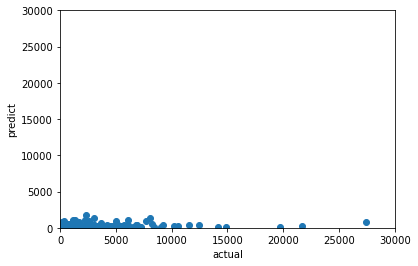

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(train['likes'],lgbm.oof);
plt.xlim(0,30000);
plt.ylim(0,30000);
plt.xlabel('actual');
plt.ylabel('predict');

In [52]:
os.makedirs(f"{OUTPUT_DIR}/imp", exist_ok=True)
feature_importance_df[order[:50]].to_csv(f"{OUTPUT_DIR}/imp/importance.csv")
display(feature_importance_df[order[:50]])

,collection_technique_w2v_1,material_collection_w2v_14,collection_technique_w2v_8,material_collection_technique_w2v_16,material_collection_w2v_18,principal_maker,principal_or_first_maker,subtitle_h,collection_technique_w2v_2,principal_or_first_maker_target_enc,...,DescriptionEmb_pca_40,acquisition_method,CE_description,AcquisitionDate_year,StringLength__description,LongTitleEmb_pca_23,LongTitleEmb_pca_0,LongTitleEmb_pca_110,ImageFeature_pca_8,LongTitleEmb_pca_8
fold_0,133284.142295,169323.673374,107801.153887,12862.323970,43928.056450,29900.902705,19905.163614,12002.227635,13172.028432,24404.806544,...,1089.000584,1690.258255,958.462153,766.370837,1688.278241,2521.651425,1038.897372,1725.897452,1510.509788,1308.977587
fold_1,128735.668980,273224.380127,251.138284,28216.737556,46352.174424,27647.029675,23591.720089,13090.715814,29.421021,23252.580045,...,1640.775750,1630.603787,2371.908644,1018.307313,2078.985605,1762.239677,3048.919893,1247.449278,1707.300249,1653.506992
fold_2,241740.988581,129336.341993,45769.503679,7171.748927,21078.244420,25968.750915,25753.631905,20031.484542,14096.900503,22228.648374,...,1032.570425,1535.031059,3249.151845,1254.946047,2168.960261,2241.830864,1693.153236,1975.840684,889.484702,701.195858
fold_3,344673.726945,82009.225281,12021.942211,10262.534765,55160.785596,28704.359927,28055.446103,12202.293652,10812.690387,18925.167542,...,2759.918377,2071.311113,1967.422513,1310.309424,1548.566678,2096.660739,1171.370363,1303.779413,1933.884158,1343.352777
fold_4,160901.713755,106764.984503,74314.779896,71786.962883,49907.746217,27584.716679,23991.726213,22248.920732,20807.135654,20671.602714,...,1840.972615,1820.410193,1762.164582,1704.669617,1702.264937,1685.442122,1683.991264,1640.679184,1628.496346,1624.779752


In [53]:
from make_data import make_oof
oof_df = make_oof(OUTPUT_DIR=OUTPUT_DIR, TARGET=cfg['target'])

In [54]:
# from score import calc_macro_auc
# score = calc_macro_auc(train_target_df=train_target_df, oof_df=oof_df, order_list=TARGET_IDS)

In [55]:
sample_sub = pd.read_csv('../../data/atmacup10__sample_submission.csv')

In [56]:
from make_data import make_sub
sub_df = make_sub(sample_sub=sample_sub, TARGET_NAME=cfg['target'], TRIAL_NAME=TRIAL_NAME, OUTPUT_DIR=OUTPUT_DIR, cv_score=lgbm.score)

QUick Sub
sh sub.sh output/20210309204842_31_use_max_depth-1/pred/pred_likes_1.0213.csv


In [57]:
sub_df.describe()

,likes
count,12008.000000
mean,21.925597
std,65.574531
min,0.000000
25%,1.062133
50%,2.486782
75%,6.265363
max,2052.353725


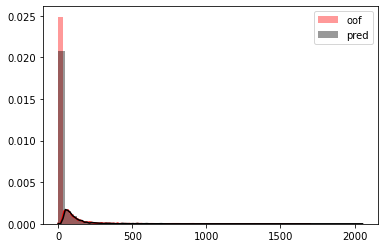

In [58]:
from make_fig import make_dist_oof_pred
make_dist_oof_pred(oof_df=oof_df,sub_df=sub_df,OUTPUT_DIR=OUTPUT_DIR)